In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb


from path_setup import setup_paths
setup_paths()

In [2]:
from dataset_transformer import BaseDatasetTransform
from base_model_train import BaseModelTrain
from model_evaluator import ModelEvaluator
from embeddings_tools import get_embeddings
from intelligence_tools import AnalyzeVariables

In [3]:
df = pd.read_csv('../datasets/Amazon_employee.csv')

In [5]:
av = AnalyzeVariables(df)

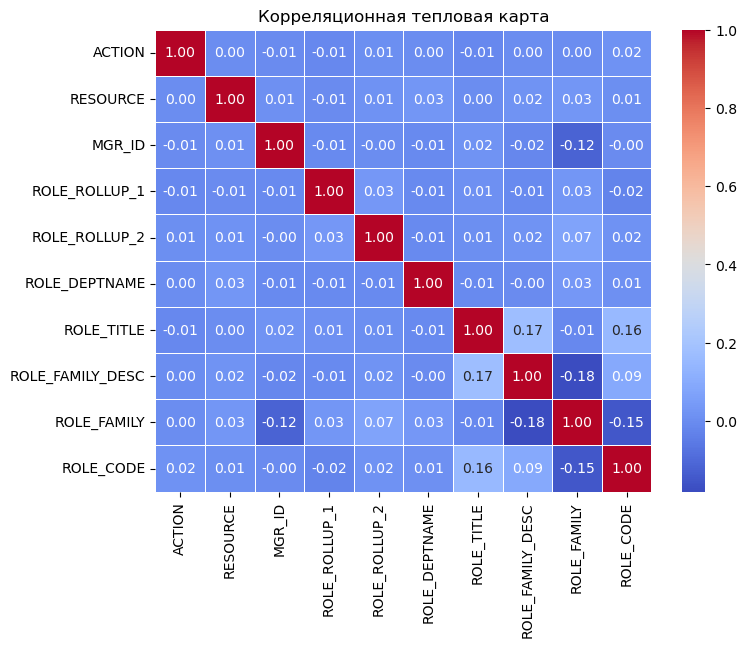

In [6]:
av.corr_heatmap()

In [14]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


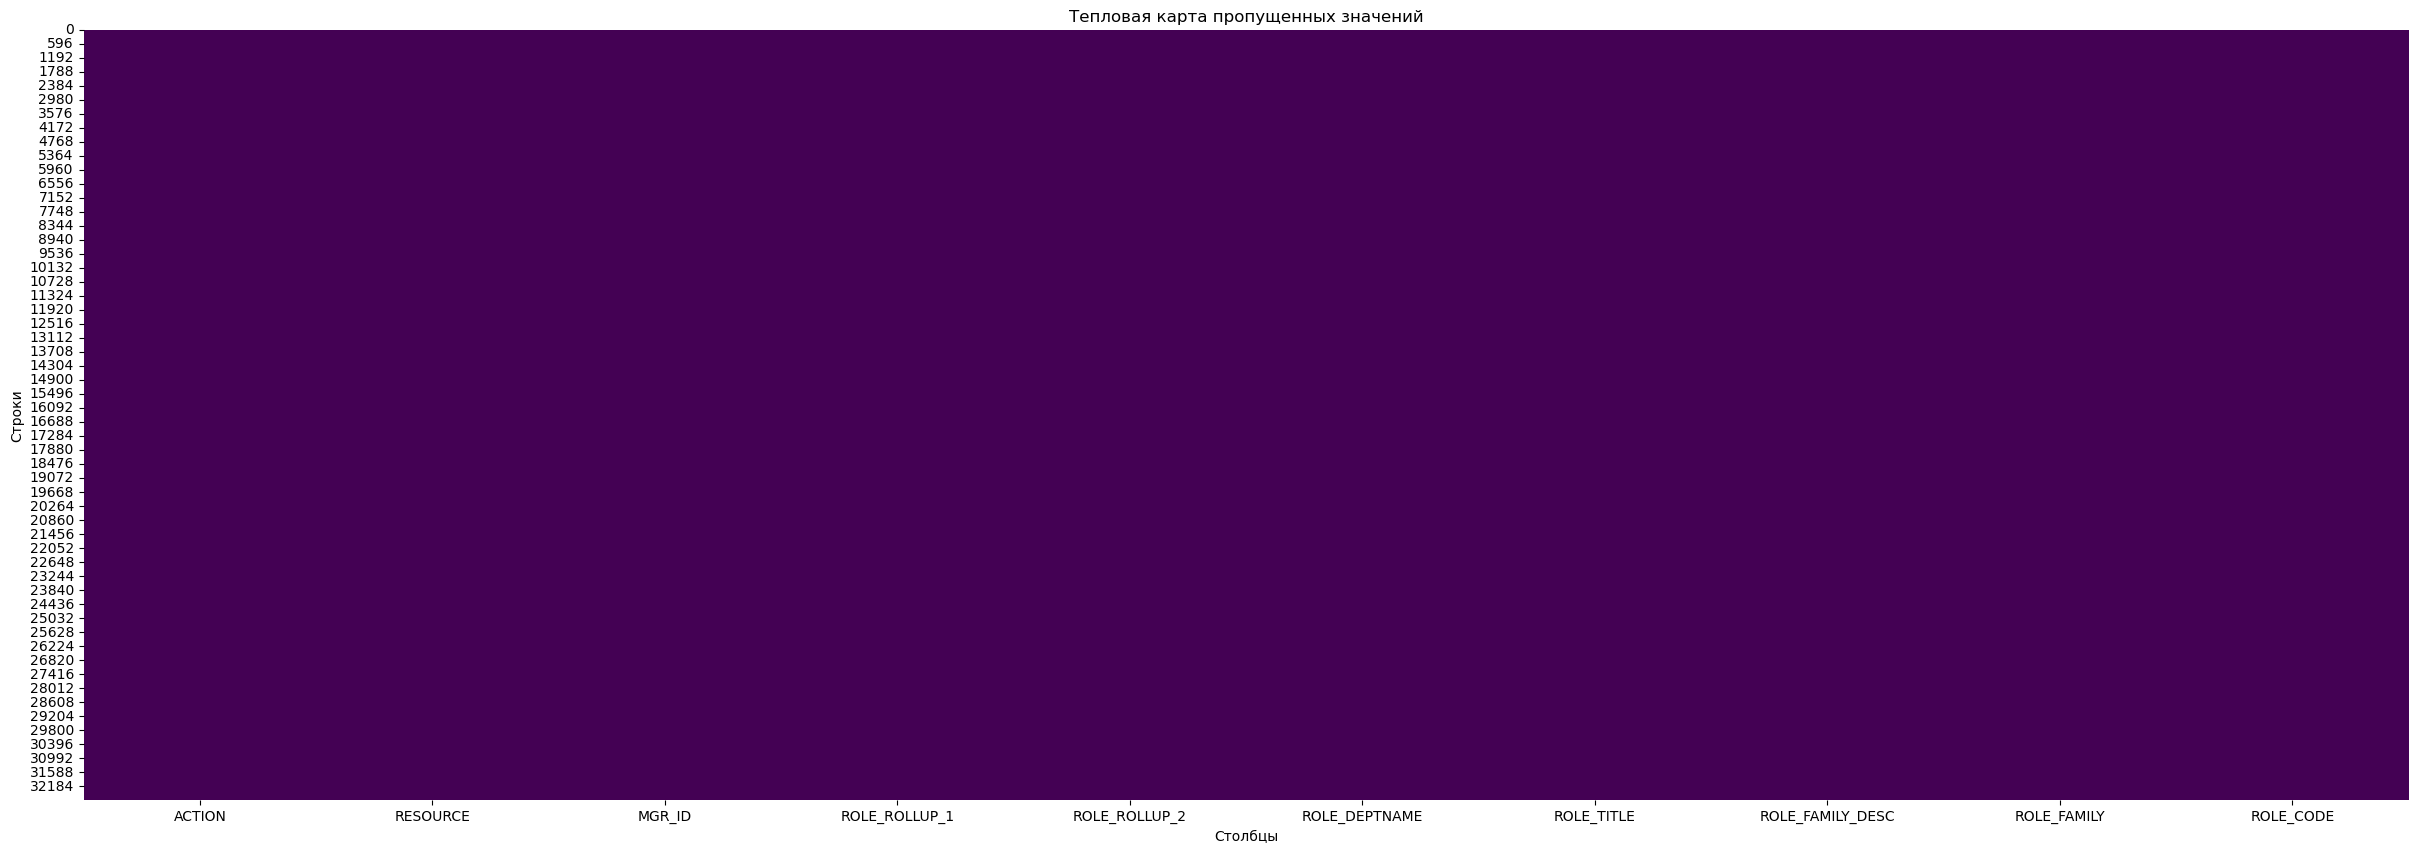

In [10]:
av.missing_heatmap()

In [11]:
bdf = BaseDatasetTransform(df,target='ACTION')

In [12]:
X_train, X_test, y_train, y_test,categorical_features = bdf.fit_transform()


Обнаружены колонки с именем "id": ['MGR_ID']
Series([], dtype: int64)

В колонке(ах) ['ACTION'] нет пропущенных значений
В наборе данных нет пропущенных значений
-------------------------------------------
Информация о колонках в датасете

Категориальные колонки:
Index([], dtype='object')

Числовые колонки:
Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')


In [16]:
lgbm_model = lgb.LGBMClassifier(verbose=-1,is_balanced=True)


columns_to_delete = []  


model_train = BaseModelTrain(
    model=lgbm_model,
    columns_to_delete=columns_to_delete,
    categorical_features=categorical_features,
    boosting_type='gbdt',
    objective='binary',
    metric='binary_error'
)


In [17]:
metrics = ['accuracy', 'precision', 'recall', 'f1_macro']
evaluator = ModelEvaluator(model_trainer=model_train, metrics=metrics)

evaluator.fit(X_train, y_train)

c:\Users\Dmitriy.Burnashev\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dmitriy.Burnashev\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


ModelEvaluator(metrics=['accuracy', 'precision', 'recall', 'f1_macro'],
               model_trainer=BaseModelTrain(categorical_features=[],
                                            columns_to_delete=[],
                                            model=LGBMClassifier(is_balanced=True,
                                                                 metric='binary_error',
                                                                 objective='binary',
                                                                 verbose=-1)))

In [18]:
evaluator.evaluate_to_dataframe(X_test, y_test)

,Metric,Score
0,accuracy,0.946394
1,precision,0.831508
2,recall,0.560000
3,f1,0.591075
